In [1]:
"""Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload."""

'Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload.'

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(cwd)

# Get the grandparent directory (two levels above)
root_dir = os.path.dirname(parent_dir)

# Add the root directory to sys.path
if root_dir not in sys.path:
    sys.path.append(root_dir)

print(f"Root directory: {root_dir} is added to sys.path")

print("CWD :", cwd)

Root directory: /Users/aag/Documents/proteinfolding is added to sys.path
CWD : /Users/aag/Documents/proteinfolding/notebooks/local_testing


In [3]:
## test imports

from proteinfolding import * ## should run without errors

##TODO: proper testing ##

In [25]:
from proteinfolding.paths import XY_QAOA_DATA_DIR, XY_QAOA_PLOTS_HYPERPARAMETER_ANALYSIS
from proteinfolding.simulations_production import statevector_simulation_XY_parallel_trained

SIMULATION_ID = "A124770" # in simulations production to be changed
PROCESSED_DATA_DIR = os.path.join(XY_QAOA_DATA_DIR, SIMULATION_ID)
PLOT_DIR = os.path.join(XY_QAOA_PLOTS_HYPERPARAMETER_ANALYSIS, f"{SIMULATION_ID}_trained")

In [ ]:
# num_rot_arr = [3]
# num_res_arr = [4, 5, 6]
# shots_arr = [10, 15, 20, 25]
# alpha_arr = [0.2]
# p_arr = [1, 2, 3, 4, 5, 6]

num_rot_arr = [4]
num_res_arr = [6]
shots_arr = [40]
alpha_arr = [0.2]
p_arr = [4, 5, 6]

pos = 0

param_list = []

for num_rot in num_rot_arr:
    for num_res in num_res_arr:
        for shots in shots_arr:
            for alpha in alpha_arr:
                for p in p_arr:
                    param_list.append((num_rot, num_res, shots, alpha, p))
                    statevector_simulation_XY_parallel_trained(num_rot=num_rot, num_res=num_res, shots=shots, alpha=alpha, p=p, pos=pos, simulation_id=SIMULATION_ID, ignore_shots=True)

Python script started!
files already present, not generating
Recovered initial point: [ 0.32366312  0.2165646   0.67559962  0.33520083  0.97771024 -0.2499894 ]
Running main function...
Filtered DataFrame for num_res=6, num_rot=4:
    num_res  num_rot                                           energies  \
19        6        4  [(-53.65699668228626+0j), (-52.60475333034992+...   

                                           bitstrings  
19  ['100010001000100010001000', '1000100010001000...  
Starting QAOA optimization loop...
DEBUG: iteration 1 - intermediate_data[-1] = [{1124424: 0.066666666666667, 1581602: 0.066666666666667, 4264226: 0.066666666666667, 4264488: 0.066666666666667, 4268360: 0.066666666666667, 4329762: 0.066666666666667, 4342818: 0.066666666666667, 4359208: 0.066666666666667, 4465794: 0.066666666666667, 4490312: 0.066666666666667, 4723780: 0.066666666666667, 4751688: 0.066666666666667, 4752452: 0.066666666666667, 8553538: 0.066666666666667, 8921362: 0.066666666666667}]
DEBU

KeyboardInterrupt: 

In [ ]:
# convert to dataframe
from proteinfolding.data_processing import clean_json_data, load_json_files, clean_intermediate_data

CWD = os.getcwd()
# data_dir = os.path.join(CWD, f"{SIMULATION_ID}_trained")
data_dir = os.path.join(CWD, "trained_outputs")

data = load_json_files(data_dir)

clean_data = clean_json_data(data)

df = clean_intermediate_data(clean_data)


In [7]:
df.head()

,num_res,num_rot,alpha,shots,p,pos,transverse_field,bitstrings,probabilities,norm,energy,elapsed_time,intermediate_data,parameters,cumulative_probability_dict,cumulative_total_dict,all_bitstrings,all_unrestricted_bitstrings,sorted_bitstrings,sorted_unrestricted_bitstrings
0,5,3,0.2,10000,3,0,1,"[010010100001001, 010010100001100, 01001001000...","[0.3670469504168495, 0.3674857393593681, 0.034...",0.4558,-25.632220,0.890161,"[{'4681': 0.002, '4684': 0.0043, '4689': 0.001...","[[[-0.17047827300081494, -0.27042749768507507,...","{'001001001001001': 0.002, '001001001001100': ...","{'001001001001001': 0.002, '001001001001100': ...",{'001001001001001': {'probability': 0.00480000...,{'001001001001001': {'probability': 0.00480000...,"[[010010100001001, {'probability': 0.1673, 'en...","[[010010100001001, {'probability': 0.1673, 'en..."
1,4,4,0.2,5000,3,0,1,"[1000001010000001, 1000010010000001, 100000011...","[0.07301587301587299, 0.1422799422799422, 0.07...",0.6930,-21.897148,1.368943,"[{'4369': 0.0026, '4370': 0.001, '4372': 0.001...","[[[0.6161103816284091, 0.22442543020074152, 0....","{'0001000100010001': 0.0026, '0001000100010010...","{'0001000100010001': 0.0026, '0001000100010010...",{'0001000100010001': {'probability': 0.0048000...,{'0001000100010001': {'probability': 0.0048000...,"[[1000001010000001, {'probability': 0.05060000...","[[1000001010000001, {'probability': 0.05060000..."
2,5,3,0.2,10000,5,0,1,"[010010100001001, 010010100001100, 01001001000...","[0.11210221793635487, 0.03567984570877532, 0.1...",0.8296,-25.632220,1.282325,"[{'4681': 0.0075, '4682': 0.0024, '4684': 0.00...","[[[-0.15056307530157348, -0.007957616865612539...","{'001001001001001': 0.0075, '001001001001010':...","{'001001001001001': 0.0075, '001001001001010':...","{'001001001001001': {'probability': 0.0141, 'e...","{'001001001001001': {'probability': 0.0141, 'e...","[[010010100001001, {'probability': 0.093, 'ene...","[[010010100001001, {'probability': 0.093, 'ene..."
3,6,4,0.2,1000,2,0,1,"[010010001000010000101000, 0100100000100100001...","[0.002447980416156669, 0.0036719706242350036, ...",0.8170,-59.276988,190.744303,"[{'1118488': 0.001, '1118497': 0.002, '1118498...","[[[-0.16892323565238435, -0.8325947150619905, ...","{'000100010001000100011000': 0.001, '000100010...","{'000100010001000100011000': 0.001, '000100010...",{'000100010001000100010010': {'probability': 0...,{'000100010001000100010010': {'probability': 0...,"[[010010001000010000101000, {'probability': 0....","[[010010001000010000101000, {'probability': 0...."
4,6,4,0.2,1000,4,0,1,"[010010001000010000101000, 0100100010000100001...","[0.05471698113207543, 0.0150943396226415, 0.08...",0.5300,-59.276988,342.582434,"[{'1118532': 0.001, '1119256': 0.002, '1120276...","[[[1.1353854751319998, 0.7138128244235854, 1.0...","{'000100010001000101000100': 0.001, '000100010...","{'000100010001000101000100': 0.001, '000100010...",{'000100010001000110000100': {'probability': 0...,{'000100010001000110000100': {'probability': 0...,"[[010010001000010000101000, {'probability': 0....","[[010010001000010000101000, {'probability': 0...."


In [8]:
from proteinfolding.paths import EXACT_DATA_DIR, EXACT_DATA_ENERGY_BITSTRING_FILE
import pandas as pd

EXACT_PATH = os.path.join(EXACT_DATA_DIR, EXACT_DATA_ENERGY_BITSTRING_FILE)
df_exact = pd.read_csv(EXACT_PATH)

In [ ]:
from proteinfolding.data_processing import generate_minimum_shots_to_ground_state_data
# # for first training of circuit, generating file for this ID
# save_dir = os.path.join(XY_QAOA_DATA_DIR, f"{SIMULATION_ID}_trained")
# os.makedirs(save_dir, exist_ok=True)  
# file_path_min_shots = os.path.join(save_dir, "df_min_shots_trained.csv")

# for QPU plots, giving lower shots with ignore_shots=True to get plot
file_path_min_shots = os.path.join(CWD, "df_min_shots_trained.csv")

df_min_shots = generate_minimum_shots_to_ground_state_data(df, df_exact)

df_min_shots.to_csv(file_path_min_shots, index=False) 


Processing num_res=5, num_rot=3, alpha=0.2, p=3
Filtered DataFrame for num_res=5, num_rot=3:
   num_res  num_rot                                           energies  \
7        5        3  [(-11.371337831020355+0j), (-11.15290468931198...   

                                          bitstrings  
7  ['100100100100100', '100100100100010', '100100...  

Processing num_res=5, num_rot=3, alpha=0.2, p=5
Filtered DataFrame for num_res=5, num_rot=3:
   num_res  num_rot                                           energies  \
7        5        3  [(-11.371337831020355+0j), (-11.15290468931198...   

                                          bitstrings  
7  ['100100100100100', '100100100100010', '100100...  

Processing num_res=5, num_rot=3, alpha=0.2, p=2
Filtered DataFrame for num_res=5, num_rot=3:
   num_res  num_rot                                           energies  \
7        5        3  [(-11.371337831020355+0j), (-11.15290468931198...   

                                          bitstring

In [10]:
df_min_shots.head()

,num_res,num_rot,num_qubits,alpha,p,min_iter,shots,min_shots
17,4,3,12,0.2,1,1,5000,5000
14,4,3,12,0.2,2,1,5000,5000
12,4,3,12,0.2,3,1,5000,5000
15,4,3,12,0.2,4,1,5000,5000
13,4,3,12,0.2,5,1,1000,1000


In [11]:
# # for already post processed simulations

# import pandas as pd
# df_min_shots = pd.read_csv(os.path.join(XY_QAOA_DATA_DIR,  f"{SIMULATION_ID}_trained", "df_min_shots_trained.csv"))


In [12]:
df_min_shots = df_min_shots.dropna().reset_index(drop=True)
print(df_min_shots)

    num_res  num_rot  num_qubits  alpha  p  min_iter  shots  min_shots
0         4        3          12    0.2  1         1   5000       5000
1         4        3          12    0.2  2         1   5000       5000
2         4        3          12    0.2  3         1   5000       5000
3         4        3          12    0.2  4         1   5000       5000
4         4        3          12    0.2  5         1   1000       1000
5         4        3          12    0.2  6         1   1000       1000
6         5        3          15    0.2  1         1   1000       1000
7         5        3          15    0.2  2         1   1000       1000
8         5        3          15    0.2  3         1   1000       1000
9         5        3          15    0.2  4         1   1000       1000
10        5        3          15    0.2  5         1   1000       1000
11        5        3          15    0.2  6         1   1000       1000
12        4        4          16    0.2  1         2   1000       2000
13    

In [13]:
df_min_shots = df_min_shots.sort_values(
    by=['num_qubits', 'num_res', 'num_rot', 'alpha', 'min_shots', 'p', 'shots'], 
    ascending=[True, True, True, True, True, True, True]
)

print(df_min_shots)

    num_res  num_rot  num_qubits  alpha  p  min_iter  shots  min_shots
4         4        3          12    0.2  5         1   1000       1000
5         4        3          12    0.2  6         1   1000       1000
0         4        3          12    0.2  1         1   5000       5000
1         4        3          12    0.2  2         1   5000       5000
2         4        3          12    0.2  3         1   5000       5000
3         4        3          12    0.2  4         1   5000       5000
6         5        3          15    0.2  1         1   1000       1000
7         5        3          15    0.2  2         1   1000       1000
8         5        3          15    0.2  3         1   1000       1000
9         5        3          15    0.2  4         1   1000       1000
10        5        3          15    0.2  5         1   1000       1000
11        5        3          15    0.2  6         1   1000       1000
13        4        4          16    0.2  2         1   1000       1000
14    

In [14]:
df_min_shots.to_csv(
    str(file_path_min_shots), 
    index=False, 
    mode="w", 
    header=True
)


In [15]:
best_combinations = df_min_shots.dropna().groupby(['num_res', 'num_rot']).apply(
    lambda g: g.loc[g['min_shots'].idxmin(), ['p', 'min_iter', 'shots', 'min_shots']]
).reset_index()
print("Best Combinations:\n", best_combinations)

Best Combinations:
    num_res  num_rot    p  min_iter   shots  min_shots
0        4        3  5.0       1.0  1000.0     1000.0
1        4        4  2.0       1.0  1000.0     1000.0
2        5        3  1.0       1.0  1000.0     1000.0
3        5        4  1.0       1.0  1000.0     1000.0
4        6        3  1.0       1.0  1000.0     1000.0
5        6        4  1.0       1.0  1000.0     1000.0


/var/folders/zr/_ww60qvd18j868qh1qhtky300000gn/T/ipykernel_46121/519301493.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_combinations = df_min_shots.dropna().groupby(['num_res', 'num_rot']).apply(


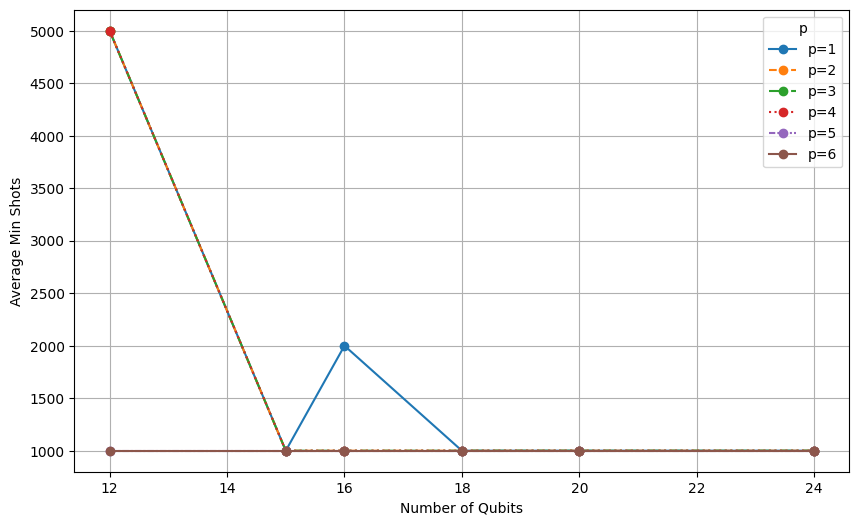

In [16]:
from proteinfolding.data_plotter import DataPlotter

plotter = DataPlotter(df_min_shots)
plotter.plot_min_shots_vs_num_qubits_per_p(save_path=PLOT_DIR)


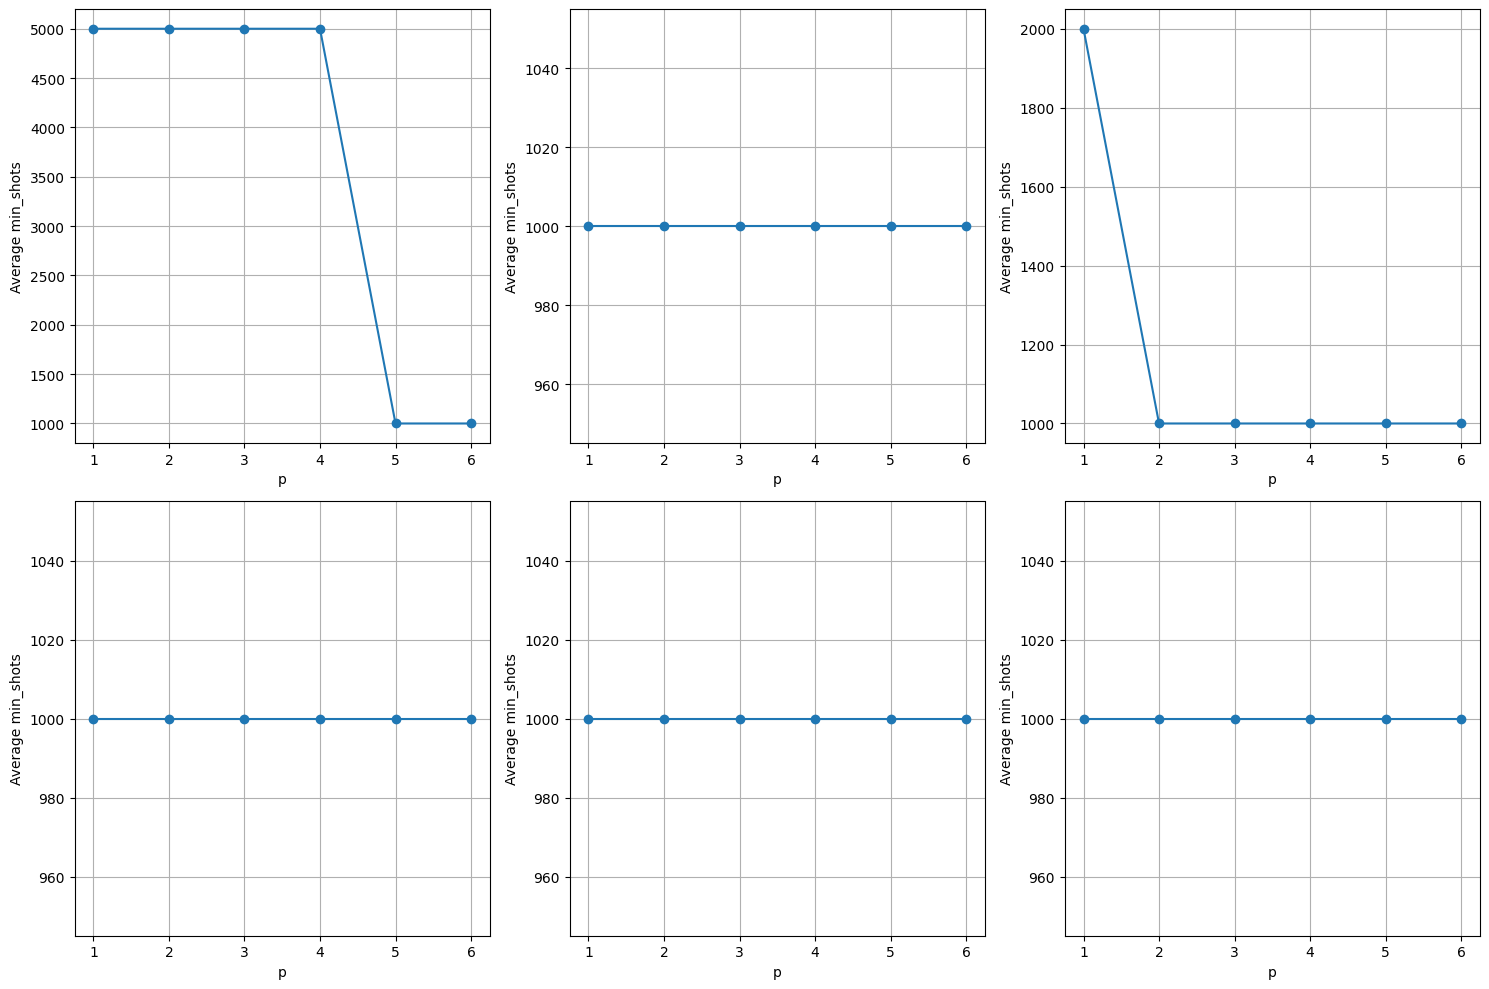

In [17]:
plotter.plot_p_vs_min_shots_per_structure(save_path=PLOT_DIR)

# Calls to QPU

In [18]:
df_qpu = df_min_shots.loc[:, ['num_res', 'num_rot', 'num_qubits', 'shots', 'p', 'min_iter']].copy()
df_qpu['qpu_calls'] = df_qpu['min_iter'] * df_qpu['shots'] 

print(df_qpu)

    num_res  num_rot  num_qubits  shots  p  min_iter  qpu_calls
4         4        3          12   1000  5         1       1000
5         4        3          12   1000  6         1       1000
0         4        3          12   5000  1         1       5000
1         4        3          12   5000  2         1       5000
2         4        3          12   5000  3         1       5000
3         4        3          12   5000  4         1       5000
6         5        3          15   1000  1         1       1000
7         5        3          15   1000  2         1       1000
8         5        3          15   1000  3         1       1000
9         5        3          15   1000  4         1       1000
10        5        3          15   1000  5         1       1000
11        5        3          15   1000  6         1       1000
13        4        4          16   1000  2         1       1000
14        4        4          16   1000  3         1       1000
15        4        4          16   1000 

In [19]:
file_path = os.path.join(root_dir, "notebooks/local_testing/QPU_calls_trained.csv")

df_qpu.to_csv(file_path, mode='a', index=False)
print("Appended new unique rows.")

print(df_qpu)

Appended new unique rows.
    num_res  num_rot  num_qubits  shots  p  min_iter  qpu_calls
4         4        3          12   1000  5         1       1000
5         4        3          12   1000  6         1       1000
0         4        3          12   5000  1         1       5000
1         4        3          12   5000  2         1       5000
2         4        3          12   5000  3         1       5000
3         4        3          12   5000  4         1       5000
6         5        3          15   1000  1         1       1000
7         5        3          15   1000  2         1       1000
8         5        3          15   1000  3         1       1000
9         5        3          15   1000  4         1       1000
10        5        3          15   1000  5         1       1000
11        5        3          15   1000  6         1       1000
13        4        4          16   1000  2         1       1000
14        4        4          16   1000  3         1       1000
15        4   

In [20]:
df_qpu = df_qpu.sort_values(
    by=['num_qubits', 'qpu_calls', 'num_res', 'num_rot', 'p'], 
    ascending=[True, True, True, True, True]
)
print(df_qpu)

    num_res  num_rot  num_qubits  shots  p  min_iter  qpu_calls
4         4        3          12   1000  5         1       1000
5         4        3          12   1000  6         1       1000
0         4        3          12   5000  1         1       5000
1         4        3          12   5000  2         1       5000
2         4        3          12   5000  3         1       5000
3         4        3          12   5000  4         1       5000
6         5        3          15   1000  1         1       1000
7         5        3          15   1000  2         1       1000
8         5        3          15   1000  3         1       1000
9         5        3          15   1000  4         1       1000
10        5        3          15   1000  5         1       1000
11        5        3          15   1000  6         1       1000
13        4        4          16   1000  2         1       1000
14        4        4          16   1000  3         1       1000
15        4        4          16   1000 

In [21]:
df_qpu.to_csv(
    str(file_path), 
    index=False, 
    mode="w", 
    header=True
)

Unique num_qubits values: [12 15 16 18 20 24]
QPU Mean Values: [3666.66666667 1000.         1166.66666667 1000.         1000.
 1000.        ]


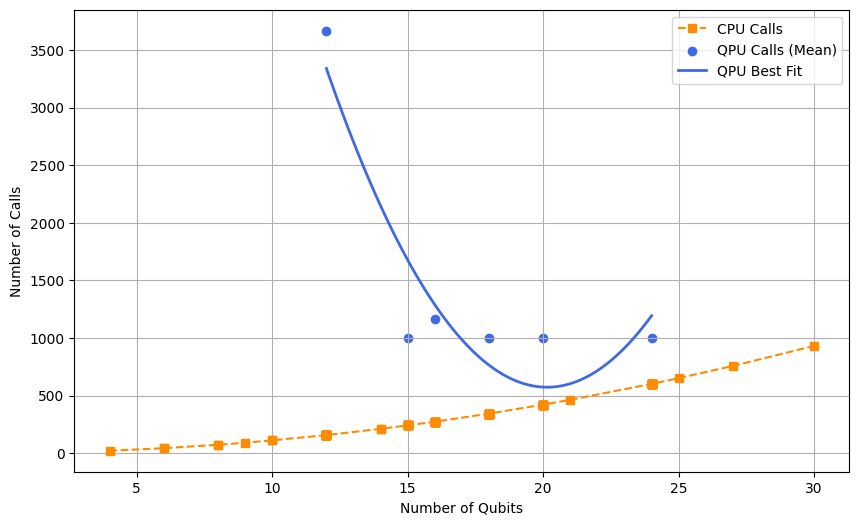

In [22]:
import matplotlib.pyplot as plt
import numpy as np

cpu_df = pd.read_csv("CPU_calls.csv")  
qpu_df = pd.read_csv("QPU_calls_trained.csv") 

df = pd.merge(cpu_df, qpu_df, on="num_qubits", how="outer", suffixes=('_cpu', '_qpu'))
df_qpu_valid = df[df["qpu_calls"].notna()] 

qpu_stats = df_qpu_valid.groupby("num_qubits")["qpu_calls"].agg(["mean", "std"]).reset_index()
qpu_stats.rename(columns={"mean": "qpu_mean", "std": "qpu_std"}, inplace=True)

print("Unique num_qubits values:", qpu_stats["num_qubits"].values)
print("QPU Mean Values:", qpu_stats["qpu_mean"].values)

if len(qpu_stats) > 2:  
    poly_coeffs = np.polyfit(qpu_stats["num_qubits"], qpu_stats["qpu_mean"], deg=2)  # Change deg=2 for a quadratic fit
    poly_fit = np.poly1d(poly_coeffs)

    num_qubits_smooth = np.linspace(qpu_stats["num_qubits"].min(), qpu_stats["num_qubits"].max(), 100)
    qpu_best_fit = poly_fit(num_qubits_smooth)

plt.figure(figsize=(10, 6))

plt.plot(df['num_qubits'], df['cpu_calls'], marker='s', linestyle='--', label="CPU Calls", color='darkorange')

plt.scatter(qpu_stats["num_qubits"], qpu_stats["qpu_mean"], label="QPU Calls (Mean)", color='royalblue')

if len(qpu_stats) > 2:
    plt.plot(num_qubits_smooth, qpu_best_fit, linestyle="-", label="QPU Best Fit", color="royalblue", linewidth=2)

plt.xlabel("Number of Qubits")
plt.ylabel("Number of Calls")
plt.legend()
plt.grid(True)

plot_path = os.path.join(root_dir, "plots/xy_qaoa/cpu_vs_qpu")
os.makedirs(plot_path, exist_ok=True)
    
plt.savefig(os.path.join(plot_path, "cpu_vs_qpu_trained_calls.pdf"))
plt.show()
plt.close()